# Stroke Prediction

Author: Mukhriddin Bakhramov

# Imports

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')


# Model Evaluations
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Scikit-Learn estimators 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Regression might seem counterintuitive, but we'll address this later
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Load the Data

In [2]:
# Stroke Prediction Dataset
# lets load our data
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [3]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Stroke Prediction


* A Stroke is a health condition that causes damage by tearing the blood vessels in the brain. It can also occur when there is a halt in the blood flow and other nutrients to the brain. According to the World Health Organization (WHO), stroke is the leading cause of death and disability globally, This model will try to predict if a person will have stroke or not

* Each row represents a person's features

* This Model will solve a Classification Problem

* There area 11 Feature Matrices in this dataset excluding Target Vector

* This dataset contains 5110 rows

* I find this Dataset to be challenging because the ratio between target distribution is almost 9:1 in favor of 0's as opposed to 1's

In [6]:
missing_value = stroke_df['bmi'].isna().sum()
total_len = len(stroke_df['bmi'])

percentage_of_missing = (missing_value/total_len)*100
percentage_of_missing

3.9334637964774952

In [7]:
cols = stroke_df.columns

for col in cols:
    if stroke_df[col].dtype == "object":
        print(f"{stroke_df[col].value_counts()}\n\n")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Yes    3353
No     1757
Name: ever_married, dtype: int64


Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




In [8]:
cols = stroke_df.columns

for col in cols:
    if stroke_df[col].dtype == "float64" or stroke_df[col].dtype == "int64":
        print(f"{stroke_df[col].value_counts()}\n\n")

9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64


78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


0    4612
1     498
Name: hypertension, dtype: int64


0    4834
1     276
Name: heart_disease, dtype: int64


93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64


28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64


0    4861
1     249
Name: stroke, dtype: int64




In [9]:
#check for duplicate
stroke_df.duplicated().sum()

0

* Dropped the id and ever_married columns since it's not providing any value to our prediction

In [10]:
# Drop id column for irrelevant data
stroke_df.drop(columns=['id','ever_married'],inplace=True)

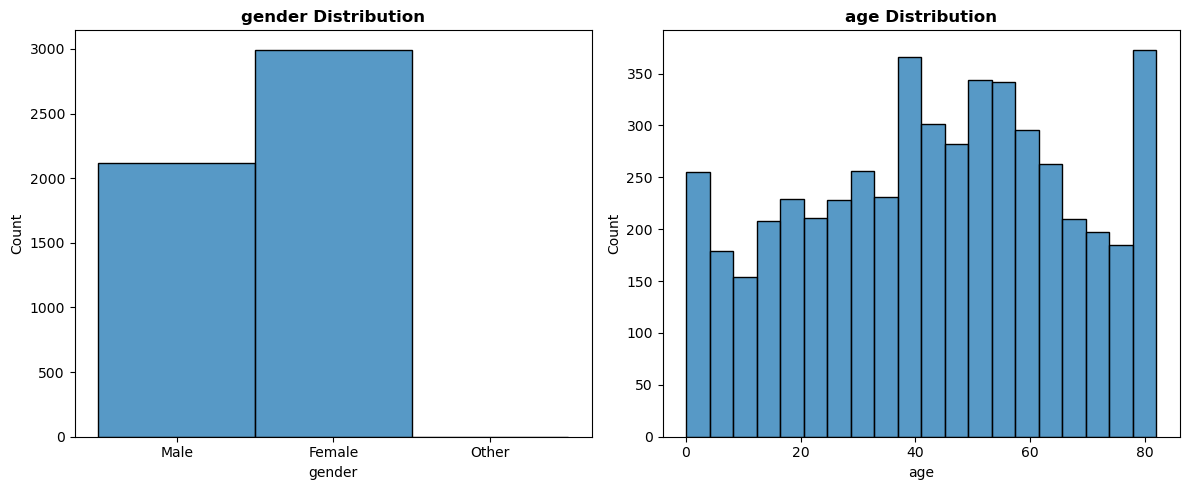

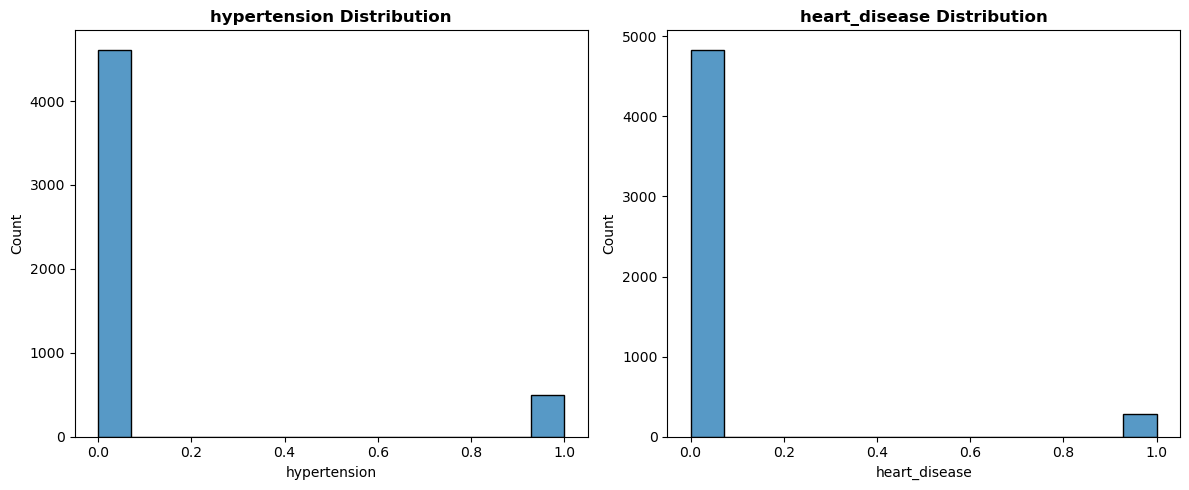

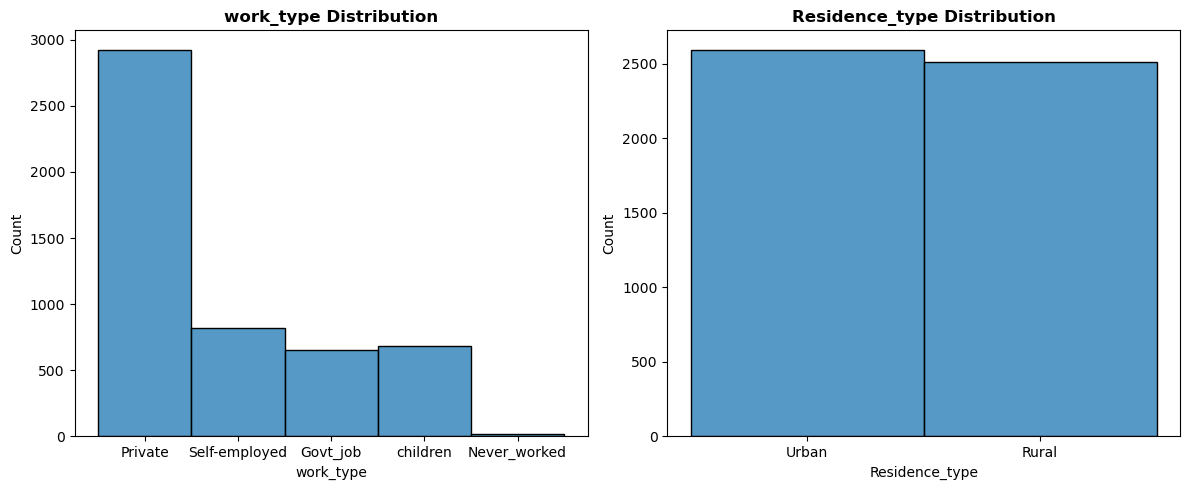

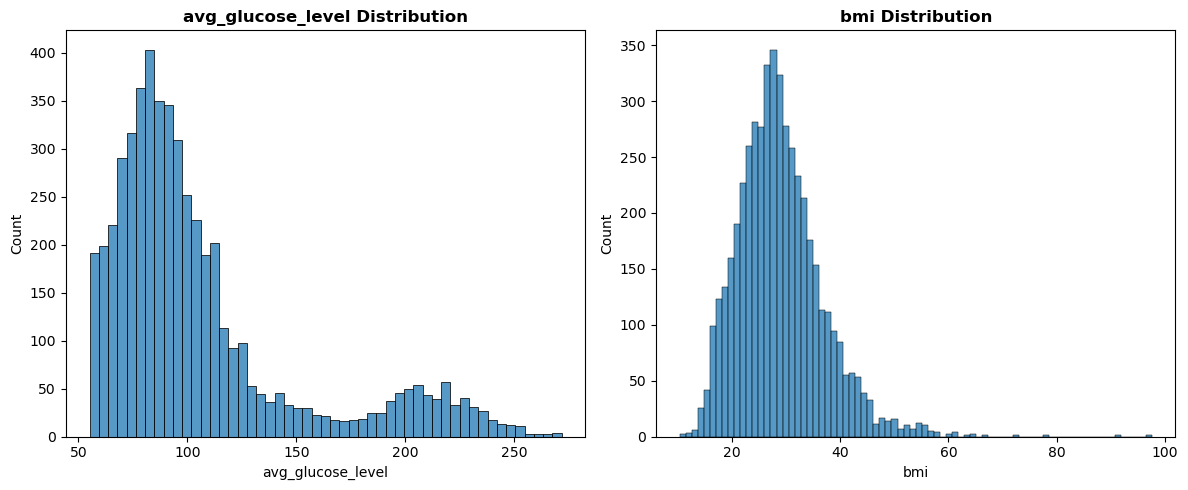

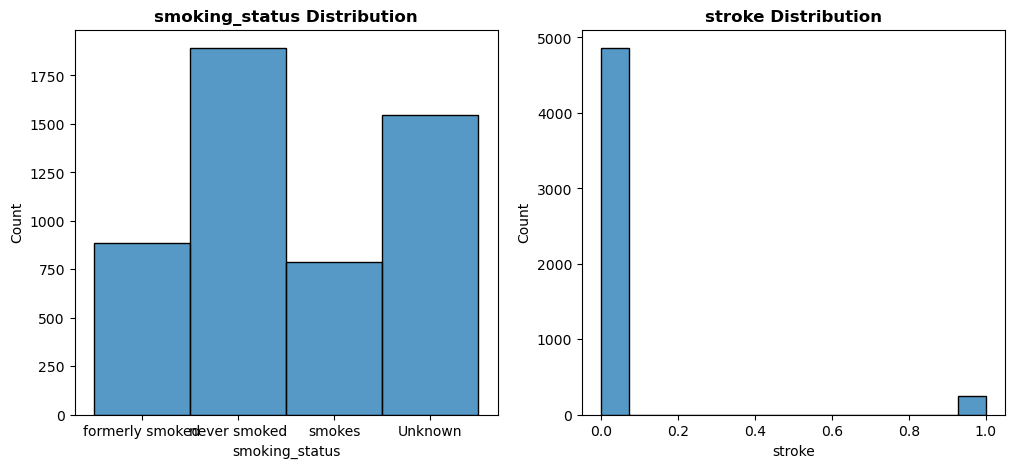

In [11]:
col_ax = 0
row_limit = 4
counter = 0
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
# Iterate to all features and display Historgram
for col in stroke_df.columns:
    # Set Historgram 
    ax=sns.histplot(data=stroke_df, x=col, ax=axes[col_ax])
    axes[col_ax].set_title(col+" Distribution", fontweight="bold")
    
    # Display every 2 cols and set new fig
    if col_ax == 1 and counter != row_limit:
        fig.tight_layout()
        fig, axes = plt.subplots(ncols=2, figsize=(12,5))
        col_ax = 0
        counter += 1
    else:
        col_ax += 1

* Here we can see the Distributions for all features and target
* bmi seemed to have impossible value but upon further research, there was a  record in the past of bmi went as high as 105
* gender have another data point called other that we need to look into
* smoking_status have a lot of unknown that we need to handle during preprocessing

In [12]:
# Create filter for other
stroke_df[stroke_df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,Private,Rural,143.33,22.4,formerly smoked,0


* dropping the gender other since it's insignificant value and outlier in our dataset

In [13]:
# Drop index where other is located
stroke_df.drop(index=3116,inplace=True)

In [15]:
# duble check
stroke_df[stroke_df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [16]:
stroke_df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.333314,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.167770,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.041322,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.175672,0.131991
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.245239,0.127891,0.134905,0.131991,0.042341,1.000000


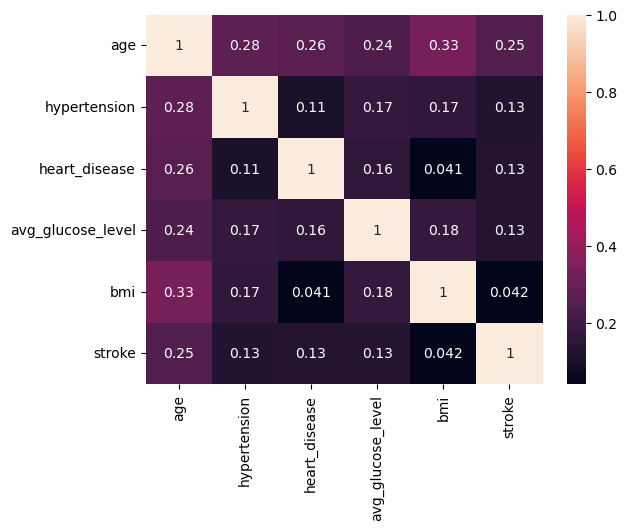

In [19]:
sns.heatmap(stroke_df.corr(), annot=True);

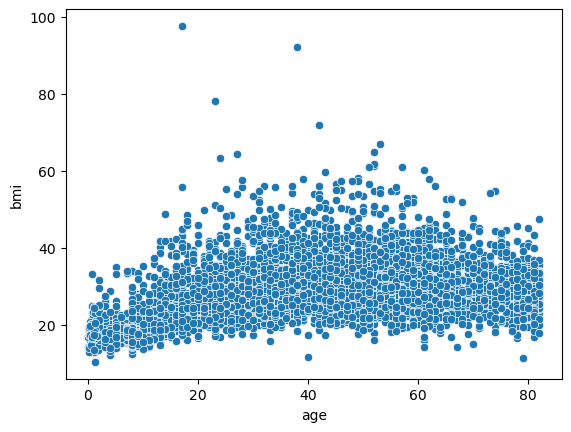

In [34]:
sns.scatterplot(data=stroke_df, x='age', y='bmi');

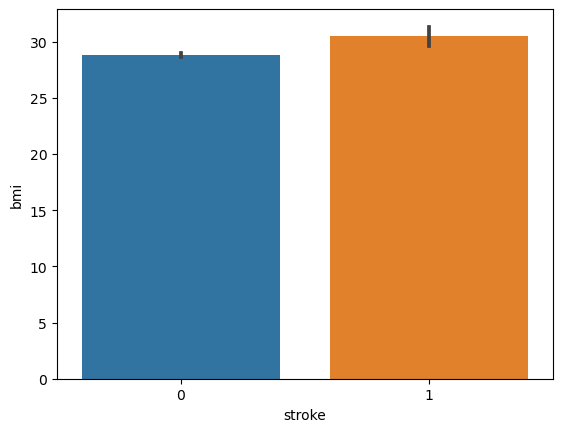

In [35]:
sns.barplot(data=stroke_df, x='stroke', y='bmi');